# mnist 데이터셋 분류


In [120]:
## 환경설정
import sys
assert sys.version_info >= (3,5)

# 사이킷런 >=0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 깔끔한 그래프 출력을 위해 
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [121]:
## 그림 저장
# 그림을 저장할 위치 
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "."+fig_extension)
    print("Saving figure: ",fig_id)
    
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
# 불필요한 경고 무시
import warnings
warnings.filterwarnings(action = "ignore", message="^internal gelsd")


- MNIST는 고등학생과 미국 인구조사국 지원들이 손으로 쓴 70,000개의 작은 숫자 이미지를 모은 데이터 셋

In [122]:
# 딕셔너리 구조 확인
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [6]:
# 데이터 타입, 수 확인 
X, y = mnist["data"].to_numpy(), mnist["target"].to_numpy() 
# mnist["data"], mnist["target"]  # numpy로 안나오면 mnist["datam"].to_numpy(), mnist["target"].to_numpy()
print(type(X), type(y))
X.shape

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


(70000, 784)

In [7]:
y.shape

(70000,)

In [8]:
X[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

Saving figure:  some_digit_plot


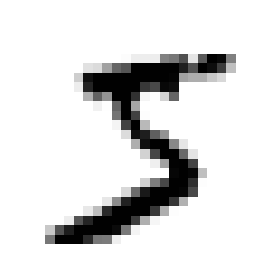

In [9]:
# 데이터 이미지는 28x28 픽셀이고, 각 특성은 0~255 픽셀 강도
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [10]:
y[0] # 레이블은 문자열임을 알 수 있음 -> 정수로 변경

'5'

In [11]:
y = y.astype(np.uint8)  # 문자열을 정수로 변경
y[0]

5

Saving figure:  digits_plot


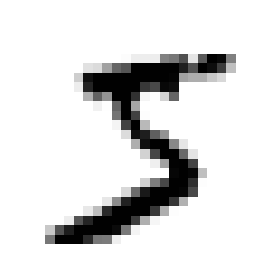

In [39]:
# 숫자 하나 출력 함수
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary, interpolation="nearest")  # interpolation: 보간: 울퉁불퉁한 부분을 부드럽게 해 준다. 
    plt.axis("off")

example_image = X[0]
plot_digit(example_image)
save_fig("digits_plot")  
plt.show()  # 그려주는 것까지 해야 그림 나온다!

In [ ]:
# 문자를 한 번에 출력하는 함수
# EXTRA

def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size, size) for instance in instances]
    n_rows = (len(instances)-1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size*n_empty)))
    
    for row in range(n_rows):
        rimages = images[row*images_per_row: (row+1)*images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    
    images = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")


In [43]:
# 문자를 한 번에 출력하는 함수  - 주석 달기
# EXTRA

def plot_digits(instances, images_per_row=10, **options):   # 줄로 된 이미지 데이터 변수로 input
    size = 28  # 이미지 28x28 이므로 size 28로 지정
    images_per_row = min(len(instances), images_per_row)  # len: instances의 개수와 10 비교하여 작은 것으로 images_per_row 지정 
    images = [instance.reshape(size, size) for instance in instances]  # 각각의 instance(784)를 28x28로 reshape하여 array에 담음
    n_rows = (len(instances)-1) // images_per_row + 1  # n_rows: (instance 총 개수-1)/images_per_row의 몫 +1
    row_images = []  # image 붙일 array 생성
    n_empty = n_rows * images_per_row - len(instances)  # 비는 칸의 개수
    
    images.append(np.zeros((size, size*n_empty)))  # images에  (28, 28*n_empty) 공간(비어있어야 하는 부분) 붙인다. 
    # -> 3일 때는 문제 안생긴다(그림이 커지기 때문에) 근데 93이면 7칸을 비워야 하기 때문에 
    
    for row in range(n_rows):  
        rimages = images[row*images_per_row: (row+1)*images_per_row]   # 1줄씩(여기서 10개씩) 이미지 rimages에 넣기
        row_images.append(np.concatenate(rimages, axis=1))  # row_images에 1줄씩 만든 이미지 열방향(옆으로) 붙인다. 
    # list 형태로 -> 한줄이 하나의 값으로 
    image = np.concatenate(row_images, axis=0)  # 위아래로 붙인다
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")  # 축 제거


In [21]:
X[:100].shape

(100, 784)

- instances: 한 줄로 들어가 있는 데이터 모음
- 각각의 instance(784개)를 28x28 사이즈로 변환한다
  

Saving figure:  more_digits_plot


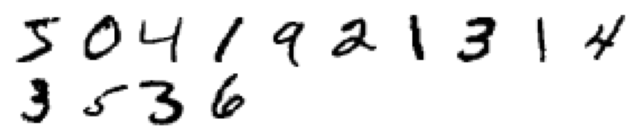

In [44]:
plt.figure(figsize=(9,9))
example_images = X[:14]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

-------

## - 5 분류기 만들어보자.

In [45]:
# Train과 Test 데이터를 60000과 나머지로 분류
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# 문제를 단순화하여 하나의 숫자인 5만 탐지하는 감지기 만들기
y_train_5 = (y_train == 5)  # yes, no 형태로 변환
y_test_5 = (y_test == 5)

# 5와 5가 아님을 구분할 수 있는 이진 분류기(binary classifier)

# SGD(Stochastic Gradient Descent: 확률적 경사 하강법) Classifier는 매우 큰 데이터셋을 효율적으로 처리하는 장점을 가지고 있음

# SCD가 한 번에 하나씩 훈련 샘플을 독립적으로 학습하기 때문

In [46]:
# SGDClassifier 인스턴스 생성 및 학습
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [47]:
# Example_image에 있는 숫자 예측하기
sgd_clf.predict([example_image])

array([ True])

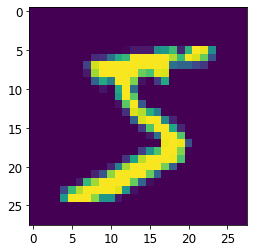

In [60]:
plt.imshow(example_image.reshape(28,28))

In [48]:
# 교차검증 =3으로 전체 데이터 평가하기
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [61]:
## 전체 레이블로 교차검증 =3으로 전체 데이터 평가하기 -> 오래걸림!
# from sklearn.model_selection import cross_val_score
# cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

KeyboardInterrupt: 

In [71]:
# 5가 아님을 분류하는 더미 분류기 만들어 보기
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)

never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

- 학습하지 않아도 90% 이상 -> 이유는 전체 데이터 셋에서 5는 10% 정도만 있기 때문
- 정확도를 분류기의 성능 측정 지표로 선호하지 않는 이유를 보여줌
- 불균형한 데이터셋을 다룰 때는 특히 그러함
    - 정답인 5는 10%밖에 없음. -> sampling해도 정확도 제대로 나오지 않음
    - 방법론: 정답이 1인데(정상:비정상 비율) 여기서 리샘플링 한다. 1:1로 맞춰주도록
        이런 식으로 학습하고 정확도도 뽑는다. 내부의 cross-validation

- 분류기의 성능을 측정하는 보편적인 방법은 오차행렬(Confusion Matrix)를 확인하는 것
- 오차행렬 생성을 위해서는 cross_val_predict로 예측한 결과 전체 데이터를 저장해야 함

In [75]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [76]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)  
# 결과: 5아님  정답 / 5아님  틀림   (0)
#       5맞음  틀림 / 5맞음  정답   (1)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [77]:
# 완벽한 분류기라면? 
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

- 정밀도: 양성 예측의 정확도  
    양성을 양성이라고 분류/양성이라고 분류  
    
- 재현율: 분류기가 정확하게 감지한 양성샘플의 비율  
    양성을 양성이라고 분류/실제 양성의 개수  

In [78]:
# 정밀도와 재현율을 확인하면?
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [79]:
# TP
cm = confusion_matrix(y_train_5, y_train_pred)
cm[1,1]/(cm[0,1]+cm[1,1])

0.8370879772350012

In [ ]:
cm

In [80]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [81]:
cm[1,1]/(cm[1,0]+cm[1,1])

0.6511713705958311

In [82]:
# F1 score: 정밀도와 재현율은 F1 score라는 하나의 숫자로 만들어서 사용
# - 보편적으로 조화평균이라고 이야기한다.

from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [84]:
cm[1,1]/(cm[1,1]+(cm[1,0]+cm[0,1])/2)

0.7325171197343847

- 정밀도와 재현율이 비슷한 분류기에서 F1 score가 높음 
- 상황에 따라 정밀도가 중요할 수도 있고 재현율이 중요할 수도 있음

### - 정밀도/ 재현율 트레이드오프
- SGD Classifier는 결정함수를 사용하여 각 샘플의 점수를 계산함
- 이 점수가 임계값보다 크면 샘플을 양성 클래스에 할당하고, 반대로도 함
- 임계값의 변화에 따라 정밀도와 재현율도 함께 변화함
- 사이킷런에서 임계값을 직접 지정할 수는 없지만 예측에 사용한 점수는 확인 가능함


In [85]:
# y_scores
y_scores = sgd_clf.decision_function([some_digit])
print("y_score:",y_scores)

# threshold
threshold = 0
y_some_digit_pred = (y_scores > threshold)
print("threshold:",threshold)

# y_some_digit_pred
print("y_some_digit_pred:",y_some_digit_pred)

# y_some_digit_pred
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
print("y_some_digit_pred", y_some_digit_pred)

# score를 몇이더라도 내가 threshold를 몇으로 잡냐에 따라 달라진다. 
# threshold(임계값)

y_score: [2164.22030239]
threshold: 0
y_some_digit_pred: [ True]
y_some_digit_pred [False]


- precision_recall_curve() 함수를 사용하면 가능한 모든 임계값에 대한 정밀도와 재현율 계산 가능함
- 이를 계산하기 위해 cross_val_predict() 함수로 모든 샘플의 점수를 구해 예측 점수를 반환하게 설정

In [87]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")


In [88]:
# Precision_recall_curve 적용
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Saving figure:  precision_recall_vs_threshold_plot


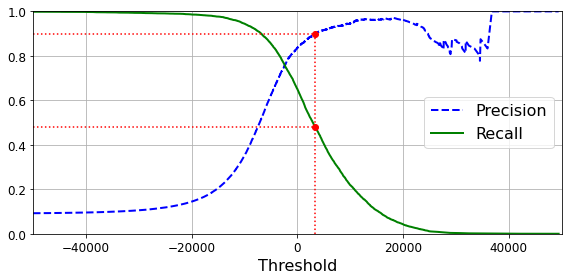

In [89]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16)  # not shown
    plt.xlabel("Threshold", fontsize=16)
    plt.grid(True)
    plt.axis([-50000,50000,0,1])
    
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

plt.figure(figsize=(8,4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0, 0.9], "r:")
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:" )
plt.plot([threshold_90_precision], [0.9], "ro")
plt.plot([threshold_90_precision], [recall_90_precision], "ro")
save_fig("precision_recall_vs_threshold_plot")
plt.show()

Saving figure:  precision_vs_recall_plot


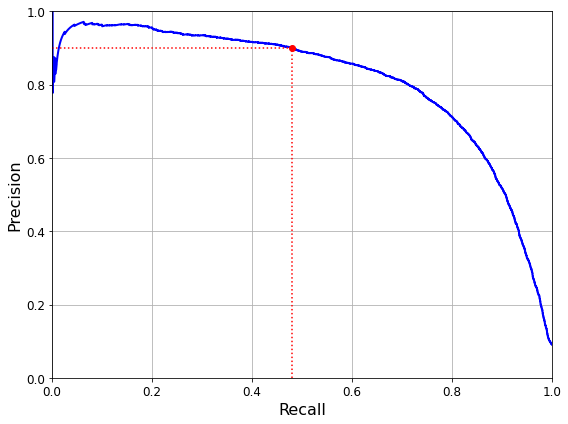

In [90]:
# 좋은 정밀도/ 재현율 트레이드 오프를 선택하는 다른 방법은 재현율에 대한 정밀도 곡선을 그리는 것
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0,1,0,1])
    plt.grid(True)
    
plt.figure(figsize=(8,6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
save_fig("precision_vs_recall_plot")
plt.show()

- 누가 더 오른쪽 끝에 가까운지 본다. 
- 재현율 0.85정도의 크게 꺾이는 지점이 가장 좋은 threshold이다.
- 하지만 모델의 목적에 따라 설정하면 된다. 
- 정확도가 90 이상이어야 한다 이러면 위의 그림의 빨간 부분처럼 설정하면 된다. 

In [91]:
# 정밀도가 90% 달성하는 것이 목표라고 가정하면
threshold_90_precision = thresholds[np.argmax(precisions>=0.90)]
print("threshold_90_precision:",threshold_90_precision)

y_train_pred_90 = (y_scores>= threshold_90_precision)

print( "precision_score", precision_score(y_train_5, y_train_pred_90) )
print( "recall_score", recall_score(y_train_5, y_train_pred_90) )

threshold_90_precision: 3370.0194991439594
precision_score 0.9000345901072293
recall_score 0.4799852425751706


### - ROC 곡선
- ROC(receiver operating characteristic: 수신기 조작 특성) 곡선도 이진 분류에서 성능 측정 도구로 널리 사용하는 도구
- 거짓양성비율(FPR:false positive rate)에 대한 진짜양성비율(TNR: true negative rate)을 뺀 값이고 이를 특이도라고 함
- 양성으로 잘못 분류된 음성 샘플의 비율이 FPR이고, 이는 1에서 음성으로 정확하게 분류한 음성 샘플의 비율인 진짜 음성 비율(TNR: true negative rate)을 뺀 값이고 이를 특이도라고 함

In [92]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Saving figure:  roc_curve_plot


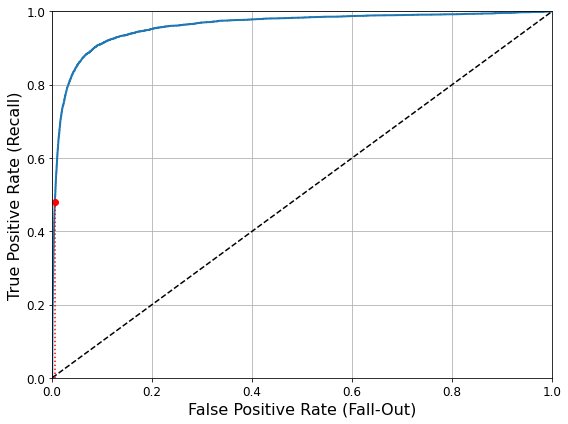

In [95]:
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')  # dashed diagonal
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)
    
plt.figure(figsize=(8,6))
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr>=recall_90_precision)]
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision],"ro")
save_fig("roc_curve_plot")
plt.show()

- 1에 가까울수록 성능이 높다.
- 정밀도, 재현율, f1-score(조화평균) 비교해야한다. 

In [96]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

### - 랜덤 포레스트와 SGD의 ROC와 AUC 점수 비교 확인

In [98]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

y_scores_forest = y_probas_forest[:, 1]  # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

Saving figure:  roc_curve_comparison_plot


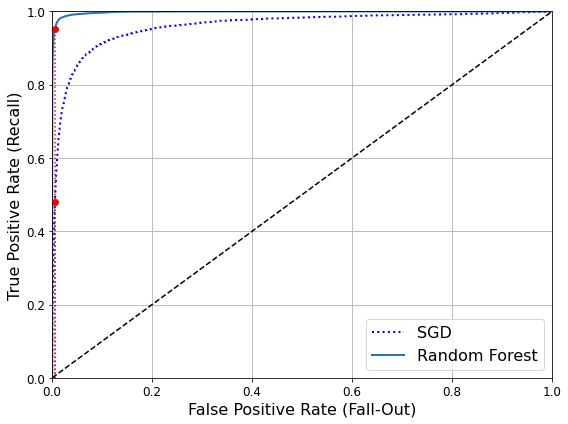

In [99]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

In [101]:
# 랜덤 포레스트와 SGD의 ROC와 AUC 점수 비교 확인
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [102]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9905083315756169

In [103]:
recall_score(y_train_5, y_train_pred_forest)

0.8662608374838591

### -다중 분류기
- 다중 분류기는 둘 이상의 클래스를 구별할 수 있음
- SGD분류기, 랜덤 포레스트 분류기, 나이브 베이즈 같은 일부 알고리즘은 여러 개의 클래스를 직접 처리할 수 있는 반면, 로지스틱 회귀나 서포트 벡터 머신 분류기 같은 다른 알고리즘은 이진 분류만 가능함
- 이를 극복하기 위해 특정 숫자 하나만 구분하는 숫자별 이진 분류기를 만든 다음 각 분류기의 결정 점수 중에서 가장 높은 것을 클래스로 선택
- 위와 같은 전략을 OvR(one-versus-the-rest)전략 또는 OVA(one-versus-all)전략으로 부름
- 다른 전략은 0과 1 구별, 0과 2 구별, 1과 2 구별과 같은 각 숫자의 조합마다 이진 분류기를 훈련시키는 것 -> 총 45개
- 이를 OvO(one-versus-one) 전략이라고 함
- 이미지 하나를 분류하려면 45개를 예측시켜 가장 많이 양성으로 분류된 클래스를 선택함

In [100]:
# 원래 타겟인 0~9가 다 있는 y_train으로 SVC를 훈련
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto", random_state=42)
svm_clf.fit(X_train[:1000], y_train[:1000])  # y_train, not y_train_5
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [104]:
# 샘플당 10개의 점수를 반환(클래스마다 하나임)
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores
# 각 숫자가 5에 얼마나 가까운지 보여줌

array([[ 2.81585438,  7.09167958,  3.82972099,  0.79365551,  5.8885703 ,
         9.29718395,  1.79862509,  8.10392157, -0.228207  ,  4.83753243]])

In [106]:
# 가장 높은 값을 뽑아 클래스와 매칭시켜 봄
np.argmax(some_digit_scores)  # index를 뽑아준다 (값 뽑아주는것 아님!)
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [107]:
svm_clf.classes_[5]

5

In [108]:
# 사이킷런에서 OvO나 OvR을 사용하도록 강제하려면 각각의 클래스를 사용하면 됨
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))
ovr_clf.fit(X_train[:1000], y_train[:1000])
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [109]:
len(ovr_clf.estimators_)

10

In [110]:
# SGDClassifier를 쉽게 학습해서 적용가능함
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

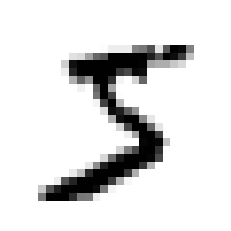

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [111]:
plot_digit(some_digit)
plt.show()
sgd_clf.decision_function([some_digit])
# 결과값을 보면 3으로 파악하였고, 5와 헷갈려 한다는 것을 알 수 있다. 

예측값은: [0]


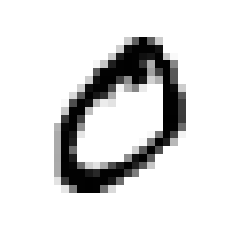

array([[ 14390.59839396, -36919.31719967,  -9811.47434817,
         -8054.56345089, -21825.25725463, -11313.62371972,
        -23649.39025808, -15986.78463914,  -3798.52944589,
        -10635.46503726]])

In [114]:
# 다른 숫자를 예측해 보자!
sgd_clf.fit(X_train, y_train)
print("예측값은:", sgd_clf.predict([X[1]]) )

plot_digit(X[1])
plt.show()
sgd_clf.decision_function([X[1]])

In [112]:
# 데이터 정규화 -> 학습 -> 평가
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [118]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

### - 오차행렬 그리기

In [124]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

Saving figure:  confusion_matrix_plot


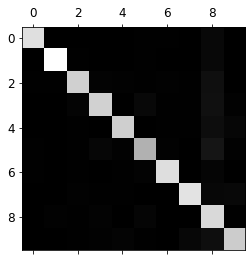

In [125]:
# 오차행렬을 색으로 표현하기
def plot_confusion_matrix(matrix):
    """ if you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)
    
plt.matshow(conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

Saving figure:  confusion_matrix_errors_plot


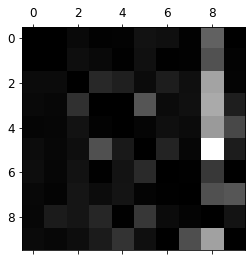

In [126]:
# 오차행렬을 색으로 표현할 때 오차만 보기
row_sums = conf_mx.sum(axis=1, keepdims = True)
norm_conf_mx = conf_mx/row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

# 밝게 나오는게 오차

Saving figure:  error_analysis_digits_plot


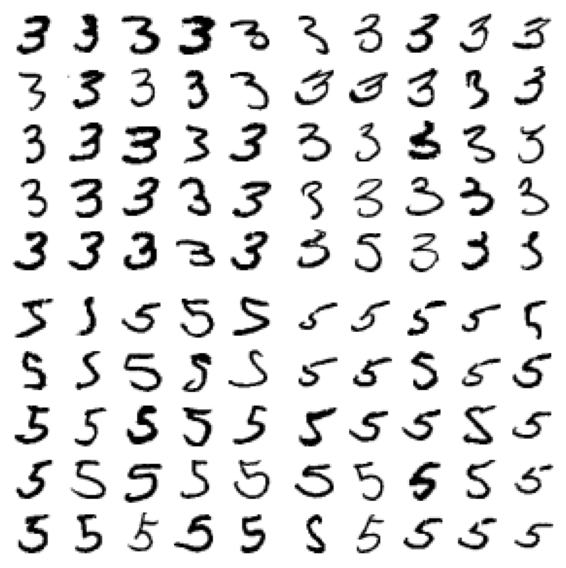

In [127]:
# 분류기가 많이 헷갈려 한 3과 5의 실제 데이터 확인하기
cl_a, cl_b = 3,5
X_aa = X_train[(y_train==cl_a)&(y_train_pred==cl_a)]
X_ab = X_train[(y_train==cl_a)&(y_train_pred==cl_b)]
X_ba = X_train[(y_train==cl_b)&(y_train_pred==cl_a)]
X_bb = X_train[(y_train==cl_b)&(y_train_pred==cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)

save_fig("error_analysis_digits_plot")
plt.show()

- 지금까지는 각 샘플이 하나의 클래스에만 할당되었지만, 분류기가 샘플마다 여러 개의 클래스를 출력해야 할 때도 있다. 
- 얼굴 인식 분류기를 생각해 보면 하나의 사진에 여러 사람이 있으면, 3명의 사람이 학습되어 있으면, y는 [1,0,1]과 같이 출력할 것이다.


In [128]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train>=7)
y_train_odd = (y_train%2==1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [129]:
knn_clf.predict([some_digit])

array([[False,  True]])

- 다중 레이블 분류기를 평가하는 방법은 많고, 적절한 지표는 프로젝트마다 다름
- 예로, 각 레이블의 F1 score를 구하고 간단하게 평균 점수를 계산할 수 있음

In [130]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605

### - 다중 출력 분류
- 다중 출력 다중 클래스 분류(다중출력분류)는 다중 레이블 분류에서 한 레이블이 다중 클래스가 될 수 있음을 일반화한 것
- 이를 위해 이미지에서 잡음을 제거하는 시스템을 만들어 볼 것임
- 잡음이 많은 숫자 이미지를 입력으로 받고, 깨끗한 숫자 이미지를 MNIST이미지처럼 픽셀의 강도를 담은 배열로 출력함
- 따라서, 분류기의 출력이 다중 레이블(픽셀당 한 레이블)이고, 각 레이블은 값을 여러 개 가짐(0~355, 픽셀 강도)

In [ ]:
# Randint()함수를 사용하여 픽셀 강도에 잡음을 추가
# 타깃은 원본 이미지
noise = np.random.randint(0,100,(len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0,100,(len(x_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [ ]:
# 원본 이미지와 노이즈 이미지 확인
some_index = 0
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
save_fig("noisy_digit_example_plot")
plt.show()

In [ ]:
# 학습 후 깨끗한 이미지로 예측
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)
save_fig("cleaned_digit_example_plot")